# Using GTX 1050 Mobile GPU for training.

In [1]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\bishw\Downloads\Compressed\Chest_xray_Corona_Metadata.csv")

In [6]:
data.drop(columns='Unnamed: 0', inplace=True)

In [19]:
data.head()

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [8]:
import os

In [16]:
os.getcwd()

'D:\\Coronahack-Chest-XRay-Dataset'

In [38]:
os.mkdir('Pneumonia')
os.mkdir('Normal')

In [39]:
os.listdir()

['Normal', 'Pneumonia', 'test', 'train']

In [23]:
normal = data.loc[(data.Label == 'Normal') & (data.Dataset_type=='TRAIN'),'X_ray_image_name'].values
pneumonia = data.loc[(data.Label != 'Normal') & (data.Dataset_type=='TRAIN'),'X_ray_image_name'].values

In [28]:
normal

array(['IM-0128-0001.jpeg', 'IM-0127-0001.jpeg', 'IM-0125-0001.jpeg', ...,
       'NORMAL2-IM-1332-0001.jpeg', 'NORMAL2-IM-1330-0001.jpeg',
       'F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg'], dtype=object)

In [24]:
import shutil

In [36]:
for i in normal:
    shutil.move(src = os.path.join(train,i), dst = r"D:\Coronahack-Chest-XRay-Dataset\Normal")

In [37]:
for i in pneumonia:
    shutil.move(src = os.path.join(train,i), dst = r"D:\Coronahack-Chest-XRay-Dataset\Pneumonia")

In [40]:
normal = data.loc[(data.Label == 'Normal') & (data.Dataset_type!='TRAIN'),'X_ray_image_name'].values
pneumonia = data.loc[(data.Label != 'Normal') & (data.Dataset_type!='TRAIN'),'X_ray_image_name'].values

In [41]:
for i in normal:
    shutil.move(src = os.path.join(test,i), dst = r"D:\Coronahack-Chest-XRay-Dataset\Normal")

In [42]:
for i in pneumonia:
    shutil.move(src = os.path.join(test,i), dst = r"D:\Coronahack-Chest-XRay-Dataset\Pneumonia")

In [25]:
os.path.join(train)

'D:\\Coronahack-Chest-XRay-Dataset\\test'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns

In [4]:
import os

In [5]:
os.chdir(r"D:\Coronahack-Chest-XRay-Dataset")

In [6]:
os.listdir()

['test', 'train']

In [7]:
train = os.getcwd()+'\\'+os.listdir()[1]
test = os.getcwd()+'\\'+os.listdir()[0]

In [8]:
num_class = len(os.listdir(train))
num_class

2

In [7]:
dim1_c = []
dim2_c = []
for i in os.listdir(r"D:\data_upload_v2\test\covid"):
    dim1_c.append(keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(r"D:\data_upload_v2\test\covid"+'\\'+i)).shape[0])
    dim2_c.append(keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(r"D:\data_upload_v2\test\covid"+'\\'+i)).shape[1])

In [10]:
dim1_nc = []
dim2_nc = []
for i in os.listdir(r"D:\data_upload_v2\test\non"):
    dim1_nc.append(keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(r"D:\data_upload_v2\test\non"+'\\'+i)).shape[0])
    dim2_nc.append(keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(r"D:\data_upload_v2\test\non"+'\\'+i)).shape[1])

c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


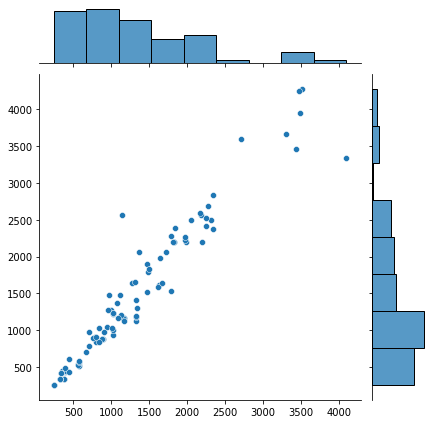

In [11]:
sns.jointplot(dim1_c, dim2_c)

In [9]:
keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(r"D:\data_upload_v2\train\covid\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg")).shape

(1482, 1989, 3)

In [17]:
std_img_dim = (224,224,3)

In [18]:
img_gen = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,horizontal_flip=True,rescale=1./255, )

In [19]:
train_gen = img_gen.flow_from_directory(train, target_size=std_img_dim[:2], color_mode='rgb', batch_size=10)

Found 5286 images belonging to 2 classes.


In [20]:
test_gen = img_gen.flow_from_directory(test, target_size=std_img_dim[:2], color_mode='rgb', shuffle=False, batch_size=10)

Found 624 images belonging to 2 classes.


In [21]:
model = keras.models.Sequential()

In [22]:
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding  = 'same', activation='relu', input_shape=std_img_dim))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding  = 'same', activation='relu', input_shape=std_img_dim))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding  = 'same', activation='relu', input_shape=std_img_dim))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding  = 'same', activation='relu', input_shape=std_img_dim))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding  = 'same', activation='relu', input_shape=std_img_dim))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding  = 'same', activation='relu', input_shape=std_img_dim))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_class, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [23]:
early_stop = keras.callbacks.EarlyStopping(patience = 2)

# Ran for only 5 epochs as the system was overheating

In [24]:
model.fit(train_gen, epochs = 10, validation_data=test_gen, callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 529 steps, validate for 63 steps
Epoch 1/10
529/529 [==============================] - 192s 362ms/step - loss: 0.5295 - accuracy: 0.7887 - val_loss: 1.1796 - val_accuracy: 0.7340
Epoch 2/10
529/529 [==============================] - 189s 358ms/step - loss: 0.3291 - accuracy: 0.8717 - val_loss: 1.0645 - val_accuracy: 0.6362
Epoch 3/10
529/529 [==============================] - 207s 391ms/step - loss: 0.2750 - accuracy: 0.8890 - val_loss: 0.5296 - val_accuracy: 0.7724
Epoch 4/10
529/529 [==============================] - 215s 407ms/step - loss: 0.3305 - accuracy: 0.8625 - val_loss: 3.1104 - val_accuracy: 0.5529
Epoch 5/10
529/529 [==============================] - 183s 346ms/step - loss: 0.2857 - accuracy: 0.8844 - val_loss: 0.6747 - val_accuracy: 0.7212


In [25]:
import pandas as pd

In [26]:
history = pd.DataFrame(model.history.history)

<AxesSubplot:>

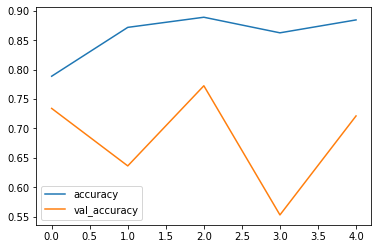

In [30]:
history[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

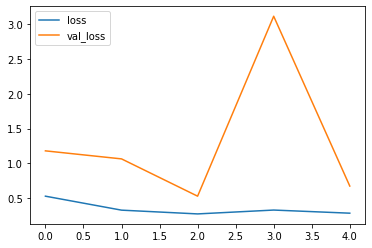

In [28]:
history[['loss','val_loss']].plot()

In [31]:
model.save('Covid19.h5')